Attribute Information:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("forestfires.csv")

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df.shape

(517, 13)

In [5]:
df.isnull().sum().sum()

0

C:\Users\Saikrishna\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


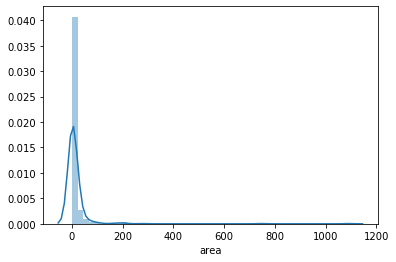

In [6]:
sns.distplot(df["area"])
plt.show()

In [7]:
df["area"] = np.log(df["area"]+1)

In [8]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


C:\Users\Saikrishna\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


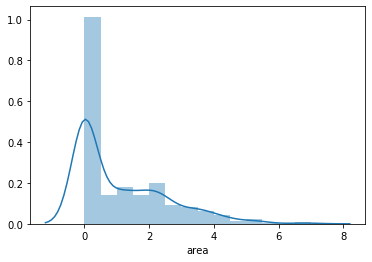

In [9]:
sns.distplot(df["area"])
plt.show()

In [10]:
df["month"] = df["month"].map(df.groupby(df["month"])["area"].mean())

In [11]:
df["day"] = df["day"].map(df.groupby(df["day"])["area"].mean())

In [12]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,0.772565,0.969771,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,0.917051,1.230719,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,0.917051,1.226396,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,0.772565,0.969771,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,0.772565,1.124093,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


#### Model Building

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = df.drop("area", axis=1)
y = df["area"]

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
LR = LinearRegression()

In [35]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
train_pred = LR.predict(x_train)
test_pred = LR.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
def model_evaluation(train_pred,test_pred):
    print("---Train---")
    print("RMSE:" , np.sqrt(mean_squared_error(train_pred,y_train)))
    print('---Test---')
    print('RMSE:', np.sqrt(mean_squared_error(test_pred,y_test)))
    
    print("---------------------------------------------------")
    
    print('---Train---')
    print('MAPE ' ,(np.mean(np.abs((train_pred - y_train) / y_train)) * 100))
    print('---Test---')
    print('MAPE: ' ,(np.mean(np.abs((test_pred - y_test) / y_test)) * 100))
    
    print("---------------------------------------------------")
    
    print('---Train---')
    print('MAE ' ,(mean_absolute_error(train_pred,y_train)))
    print('---Test---')
    print('MAE: ' ,(mean_absolute_error(test_pred,y_test)))
    

In [57]:
model_evaluation(train_pred,test_pred)

---Train---
RMSE: 1.351732198400037
---Test---
RMSE: 1.3614408797816229
---------------------------------------------------
---Train---
MAPE  inf
---Test---
MAPE:  inf
---------------------------------------------------
---Train---
MAE  1.0985593906544204
---Test---
MAE:  1.1488300667390179


In [45]:
from sklearn.linear_model import Lasso,Ridge

In [46]:
lasso = Lasso()

In [49]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
train_pred = lasso.predict(x_train)
test_pred = lasso.predict(x_test)

In [59]:
model_evaluation(train_pred,test_pred)

---Train---
RMSE: 1.3951260771304903
---Test---
RMSE: 1.387256950213497
---------------------------------------------------
---Train---
MAPE  inf
---Test---
MAPE:  inf
---------------------------------------------------
---Train---
MAE  1.1542507311125163
---Test---
MAE:  1.182136924898098


In [60]:
ridge = Ridge()

In [62]:
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:
train_pred = ridge.predict(x_train)
test_pred = ridge.predict(x_test)

In [64]:
model_evaluation(train_pred,test_pred)

---Train---
RMSE: 1.351894004763297
---Test---
RMSE: 1.3640412259301493
---------------------------------------------------
---Train---
MAPE  inf
---Test---
MAPE:  inf
---------------------------------------------------
---Train---
MAE  1.0994392775444297
---Test---
MAE:  1.1478805297830972


In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
DT = DecisionTreeRegressor()

In [68]:
param_grid = {
    "max_depth":[5,10,15],
    "min_samples_split":[5,10,15,20,30]
}

In [18]:
from sklearn.model_selection import GridSearchCV

In [70]:
DT_grid = GridSearchCV(DT,param_grid=param_grid,cv=5,n_jobs=-1)

In [71]:
DT_grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20, 30]},
             pre_dispatch='2*n_jobs', 

In [72]:
DT_grid.best_params_

{'max_depth': 5, 'min_samples_split': 30}

In [73]:
train_pred = DT_grid.predict(x_train)
test_pred = DT_grid.predict(x_test)

In [74]:
model_evaluation(train_pred,test_pred)

---Train---
RMSE: 1.2957142858266835
---Test---
RMSE: 1.4654182641197513
---------------------------------------------------
---Train---
MAPE  inf
---Test---
MAPE:  inf
---------------------------------------------------
---Train---
MAE  1.0248160623098868
---Test---
MAE:  1.2317104864205226


In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
RF = RandomForestRegressor()

In [77]:
params = {
    "n_estimators" : [5,9, 18, 27, 36, 45],
    "max_depth" : [5,8,12,15],
    "min_samples_leaf" : [2, 4]
    
}

In [78]:
RF_grid = GridSearchCV(RF, param_grid=params, cv=5,n_jobs=-1)

In [79]:
RF_grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [80]:
RF_grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 45}

In [81]:
train_pred = RF_grid.predict(x_train)
test_pred = RF_grid.predict(x_test)

In [82]:
model_evaluation(train_pred,test_pred)

---Train---
RMSE: 1.1760638193386814
---Test---
RMSE: 1.3947932920376331
---------------------------------------------------
---Train---
MAPE  inf
---Test---
MAPE:  inf
---------------------------------------------------
---Train---
MAE  0.9518807713007745
---Test---
MAE:  1.170936468785791


In [19]:
from sklearn.svm import SVR

In [20]:
param_grid = {

'C': [0.5, 1],
'gamma': [0.1, 1], 
'kernel':['linear', 'poly', 'rbf']} #sigmoid

In [21]:
svm = SVR()
svm

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
svm_grid = GridSearchCV(svm,param_grid=param_grid,cv=3,n_jobs=-1)

In [22]:
svm.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
train_pred = svm.predict(x_train)
test_pred = svm.predict(x_test)

In [24]:
model_evaluation(train_pred,test_pred)

---Train---
RMSE: 1.5582234258086871
---Test---
RMSE: 1.355905297974156
---------------------------------------------------
---Train---
MAPE  inf
---Test---
MAPE:  inf
---------------------------------------------------
---Train---
MAE  1.1062812521677357
---Test---
MAE:  0.9762629775466234


In [25]:
from xgboost import XGBRegressor

In [26]:
XGB = XGBRegressor()

In [28]:
XGB.fit(x_train,y_train)

C:\Users\Saikrishna\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:45:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [29]:
train_pred = XGB.predict(x_train)
test_pred = XGB.predict(x_test)

In [30]:
model_evaluation(train_pred,test_pred)

---Train---
RMSE: 1.0360987778344088
---Test---
RMSE: 1.2972044467472468
---------------------------------------------------
---Train---
MAPE  inf
---Test---
MAPE:  inf
---------------------------------------------------
---Train---
MAE  0.8038382751655531
---Test---
MAE:  1.06168323445834
